# Bitmap Graphics with Python
## Part 1: manipulating single pixels


* Check out the notebook "Image Manipulation Basics"
* Read Chapter 4 of the "Bildverarbeitung" book (Nischwitz et al.)
* Only use methods from PIL/Pillow and implement all filters yourself.

In [1]:
from PIL import Image
from ipywidgets import interact, fixed
i_rgba = Image.open("example.png")

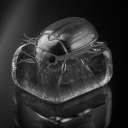

In [2]:
i_g = i_rgba.convert("L")
i_g

In [3]:
# return an inverted copy of a grayscale image, 
# i.e. change a pixel value of 100 to 255-100=155.
def invert(image):
    
    def invert_pixel(value):
        return 255-value
    
    return image.point(invert_pixel)

**Hint:** Here, we use the ``Image.point()`` function here instead of a for-loop. It applies a given function to each individual pixel. 
However, if you want to apply a function that requires an additional parameter (e.g., the level of posterization), you need to *partially apply* the filter functions beforehand. 
Alternatively, you can use a nested for-loop (For both options, see the *Image Manipulation Basics* tutorial.)

CPU times: user 117 µs, sys: 50 µs, total: 167 µs
Wall time: 172 µs


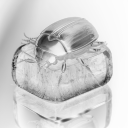

In [4]:
#You can check the runtime of a function with Jupyter's built-in ``%time`` method:
%time invert(i_g)

In [17]:
# return a posterized copy of the image with `num_levels` different, equally spaced brightness levels.
# For example, with three levels, the resulting image should only contain values 0, 128, 255. 
# You need not be absolutely precise with the values here.

@interact(image=fixed(i_g),num_levels=(2,32))
def posterize(image, num_levels):
    img = image.copy()
    spacing = 255/num_levels
    threshold = 255/(num_levels-1)
    
    def posterize_pixel(value):
        level = 0
        new_value = 0
        for x in range(1,num_levels):
            if value > (x*spacing):
                new_value = threshold*x
        return int(new_value)

    return img.point(posterize_pixel)

interactive(children=(IntSlider(value=17, description='num_levels', max=32, min=2), Output()), _dom_classes=('…

Next step: scale image brightness (see Nischwitz et al., S. 93)
Hint: you can use a lambda function here - see e.g. the ``Image.point()`` documentation

In [6]:
def linear_scale(image, offset, scale):
    return image.point(lambda x: int(x*scale)+offset)

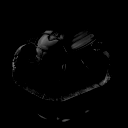

In [7]:
linear_scale(i_g, -100,1)

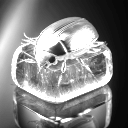

In [8]:
linear_scale(i_g, 0,3)

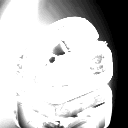

In [9]:
linear_scale(i_g, -50,10)

## RGB
Write a function that colorizes a grayscale image, i.e. makes it red, green, etc.
**Hint:** try multipling the pixel value with the color

In [15]:
def colorize(image, color_tuple):
    img = image.convert("RGB")

    def iterate():
        def colorize_pixel(value):
            (r,g,b) = color_tuple
            rgb2 = (int(r*value/255),int(g*value/255),int(b*value/255))
            return rgb2

        for x in range(img.width):
            for y in range(img.height):
                value = image.getpixel((x,y))
                img.putpixel((x,y),colorize_pixel(value))
                
    iterate()
    return img

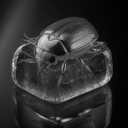

In [18]:
colorize(i_g, (255,255,255))

## Open Tasks
Complete one of the following tasks:

* create an Andy-Warhol-inspired collage of differently colored variations of a source image (check Pillow documentation on how to combine images)
* create a posterize or invert function that works with color images
* create a function that creates arbitrary color gradients
* swaps the channels of an image (i.e. swap values of red channel and green channel)

In [25]:
@interact(width=(0,1024),height=(0,1024),r1=(0,255),g1=(0,255),b1=(0,255),r2=(0,255),g2=(0,255),b2=(0,255))
def generate_gradient(width,height,r1,g1,b1,r2,g2,b2):
    i = Image.new("RGB",(127,127))
    (dr,dg,db) = (r2-r1,g2-g1,b2-b1)
    base=0
    for y in range(127):
        scale = base
        for x in range(127):
            scale+=1
            i.putpixel((x,y),(r1+int(dr*scale/256),g1+int(dg*scale/256),b1+int(db*scale/256)))
        base+=1
    return i.resize((width,height))

interactive(children=(IntSlider(value=512, description='width', max=1024), IntSlider(value=512, description='h…